<a href="https://colab.research.google.com/github/GonzaloToyosFiuba/Analisis-Numerico/blob/main/Tp_num%C3%A9rcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A1

In [2]:
# Datos
NP = 100000
Aterr = 17.32 * NP / 3000 # Área del terreno [m^2]

# Valores iniciales
V0 = 0 # [m^3]

In [3]:
duracion = 1  # [h]
dt = 0.01     # [h]
pasos = int(duracion / dt)

V = V0

intensidad = 85.0 / 1000   # Intensidad de cada lluvia [m / h]

# Método de Euler
for i in range(1, pasos + 1):
    Q_in = intensidad * Aterr
    V = V + dt * intensidad * Aterr

print(f"El volumen de agua en el sótano tras 1 hora es {V}m^3")

El volumen de agua en el sótano tras 1 hora es 49.0733333333333m^3


In [4]:
intensidad = 85  # [mm / h]
duracion = 1     # [h]
precipitacion = intensidad * duracion # [mm]

#   1mm  ______  10m^3/ha
#   85mm ______  x = 850m^3/ha
x = precipitacion * 10 / 1

AterrHa = Aterr / 10000

v_lluvia = x * AterrHa

print(f"El volumen de lluvia tras 1 hora es {v_lluvia}m^3")

El volumen de lluvia tras 1 hora es 49.07333333333334m^3


# A2

In [5]:
# Datos
NP = 100000
Aterr = 17.32 * NP / 3000 # Área del terreno [m^2]
Qmax = 8                  # Caudal máximo que puede extraer la bomba [m^3 / h]
DeltaHmax = 4             # Máximo desnivel que puede extraer la bomba, entre la superficie del agua y el desagote [m]
DeltaHmin = 1             # Mínimo desnivel que puede extraer la bomba, entre la superficie del agua y el desagote [m]
Hs = 3.5                  # Altura del sótano [m]
As = 8.66 * 8.66          # Área del sótano [m^2]
Vs = Hs * As              # Volumen del sótano [m^3]
tk = 1 - NP / 140000      # Tiempo característico [h]
Csat = 0.9                # Coeficiente de infiltración con el suelo saturado de agua []

# Valores iniciales
V0 = 0 # [m^3]
C0 = 0.6 # []

In [6]:
def graficar_para_qmax(Qmax, limite_de_volumen=None):
    duraciones = [5/60, 10/60, 15/60, 30/60, 1, 3, 6, 12, 24, 72]                   # Duración de cada lluvia. Solo llueve desde t = 0 hasta la duración de la lluvia. [h]
    intensidades = [241.4, 190.7, 162.6, 119.6, 85.0, 41.7, 26.4, 16.7, 10.9, 5.2] # Intensidad de cada lluvia [mm / h]
    intensidades = [i / 1000 for i in intensidades]   # Paso las intensidades a [m / h]

    intervalos = [0.01, 0.01, 0.01, 0.05, 0.05, 0.1, 0.1, 0.1, 0.2, 0.5] # Intervalo de tiempo entre cada iteración del método de Euler. [h]
    tiemposTotales = [3, 5, 5, 8, 10, 15, 20, 24, 48, 100]  # Tiempo suficiente hasta que se vacía el sótano [h]


    # Iterar sobre cada (duracion, instensidad, intervalo y tiempo total)
    for dur, intensidad, dt, tiempoTotal in zip(duraciones, intensidades, intervalos, tiemposTotales):
        pasos = int(tiempoTotal / dt)

        V = np.zeros(pasos + 1)
        C = np.zeros(pasos + 1)
        t = np.linspace(0, tiempoTotal, pasos + 1)

        V[0] = V0
        C[0] = C0

        # Método de Euler
        for i in range(1, pasos + 1):
            # Si hay lluvia Qin es el de la lluvia, si no ya no entra
            if t[i] <= dur:
                Q_in = C[i-1] * intensidad * Aterr
            else:
                Q_in = 0

            H = V[i-1] / As
            DeltaH = Hs - H
            Q_out = Qmax * np.sqrt((DeltaHmax - DeltaH) / (DeltaHmax - DeltaHmin))

            V[i] = V[i-1] + dt * (Q_in - Q_out)
            C[i] = C[i-1] + dt * (V[i-1] / (Vs * tk)) * (Csat - C[i-1])

            if V[i] < 0:
                V[i] = 0

        # Gráfico por iteración
        plt.figure(figsize=(10, 5))
        dur_str = dur
        if dur < 1:
          dur_str = f"{dur:.3f}"
        plt.plot(t, V, label=f'Volumen de agua en el sótano [m^3]\nDuración: {dur_str} h, Intensidad: {intensidad*1000:.1f} mm/h')
        if limite_de_volumen:
            plt.axhline(y=limite_de_volumen, color='r', linestyle='--', label=f"Límite de {limite_de_volumen} m³")
        plt.xlabel('Tiempo [h]')
        plt.ylabel('Volumen [m^3]')
        plt.title('Simulación de Inundación en el Sótano')
        plt.legend()
        plt.grid()
        plt.show()


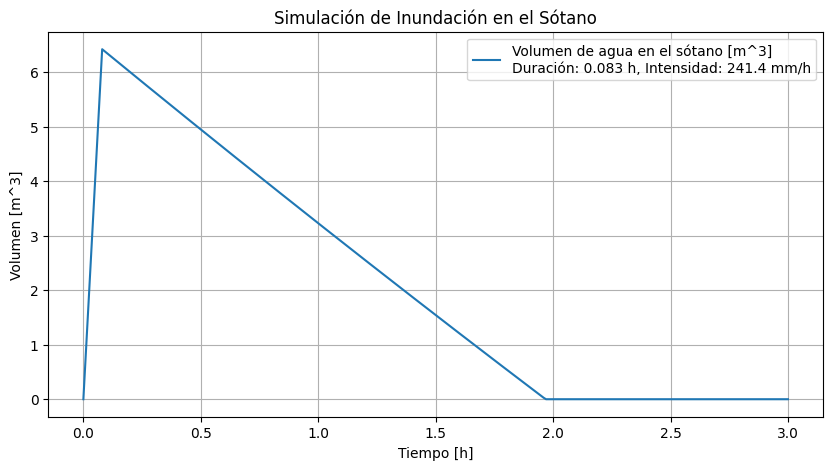

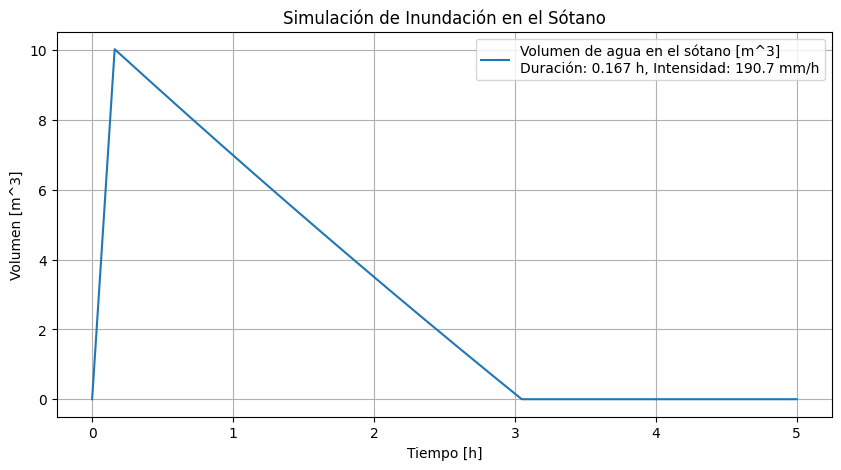

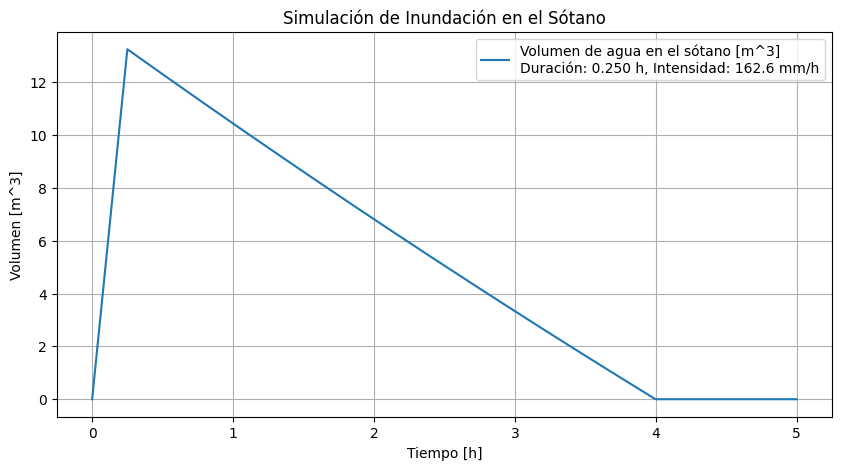

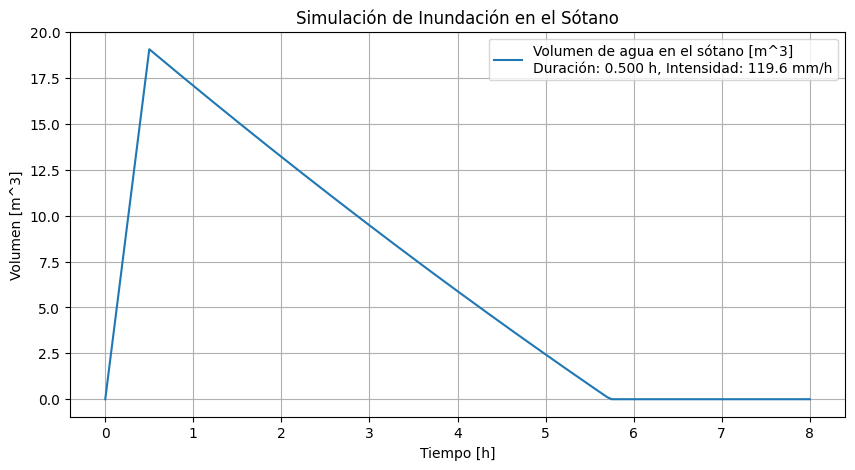

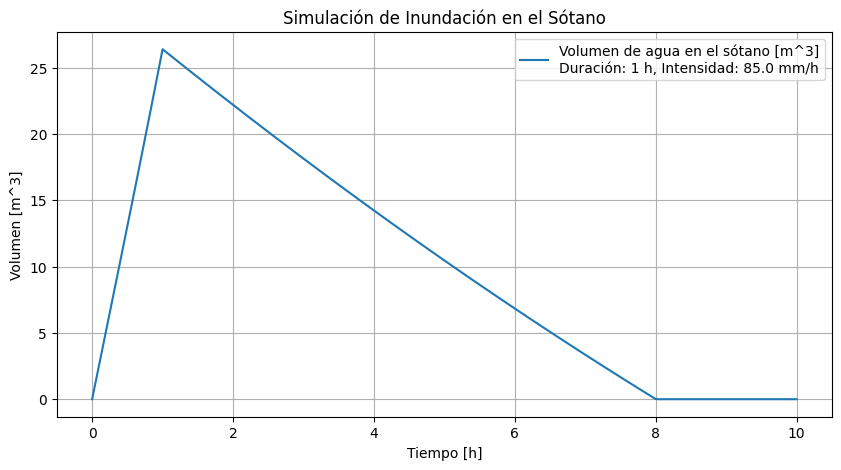

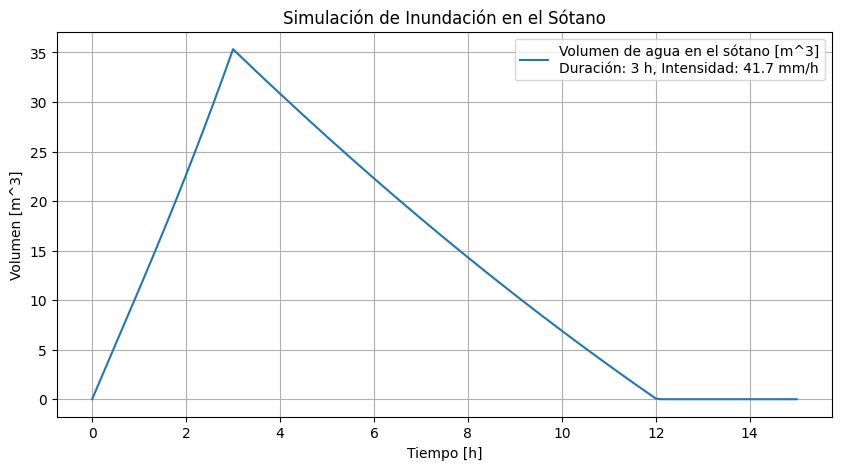

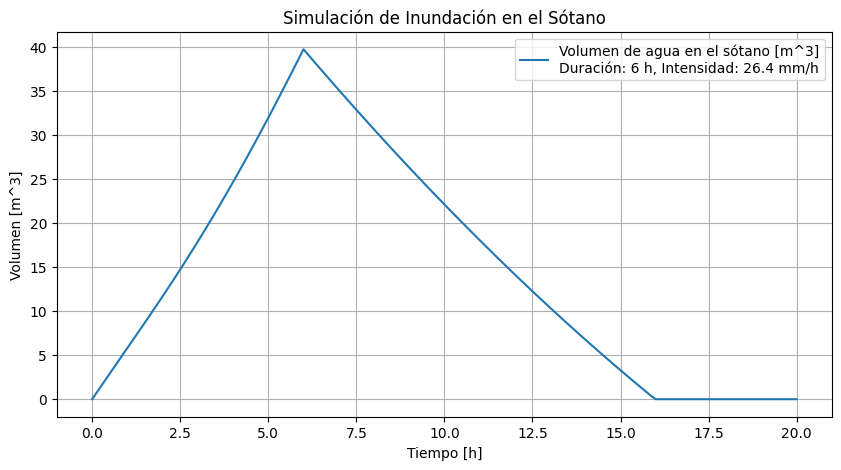

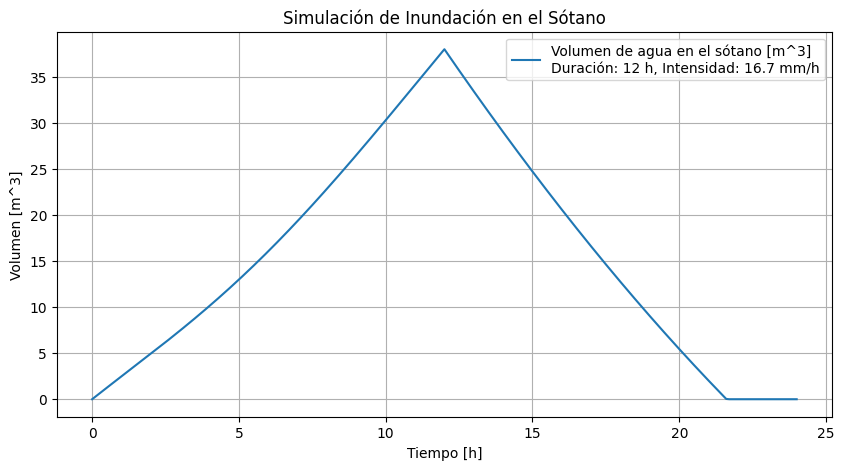

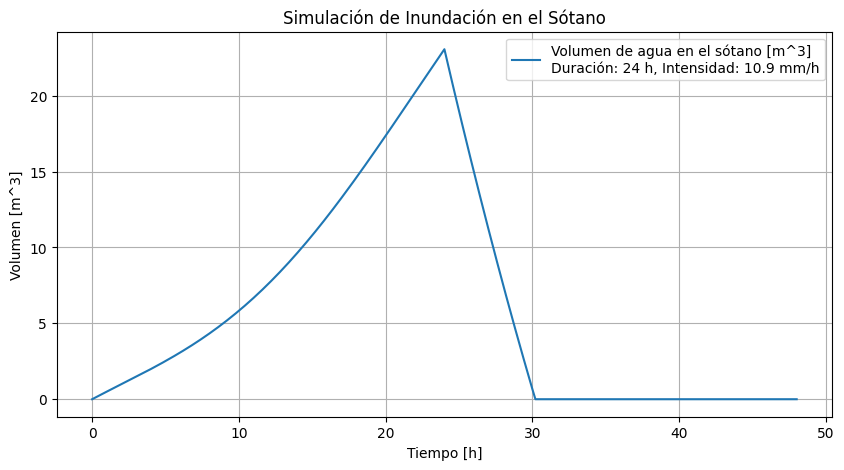

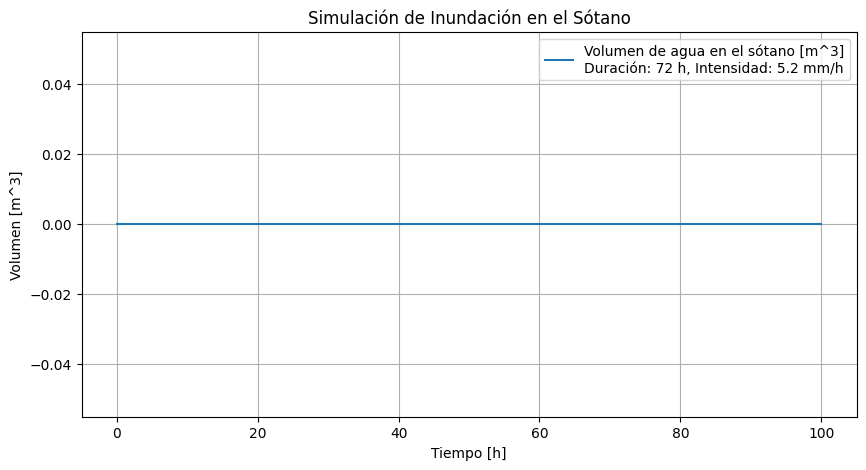

In [7]:
graficar_para_qmax(Qmax)

# B

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función para realizar la simulación
def simular(Qmax, valor_maximo_permitido):
    # Datos generales
    NP = 100000
    Aterr = 17.32 * NP / 3000  # Área del terreno [m^2]
    DeltaHmax = 4  # Máximo desnivel que puede extraer la bomba [m]
    DeltaHmin = 1  # Mínimo desnivel que puede extraer la bomba [m]
    Hs = 3.5  # Altura del sótano [m]
    As = 8.66 * 8.66  # Área del sótano [m^2]
    Vs = Hs * As  # Volumen del sótano [m^3]
    tk = 1 - NP / 140000  # Tiempo característico [h]
    Csat = 0.9  # Coeficiente de infiltración con el suelo saturado de agua []

    # Valores iniciales
    V0 = 0  # [m^3]
    C0 = 0.6  # []

    # Parámetros de lluvia
    duraciones = [5/60, 10/60, 15/60, 30/60, 1, 3, 6, 12, 24, 72]  # Duración de cada lluvia [h]
    intensidades = [241.4, 190.7, 162.6, 119.6, 85.0, 41.7, 26.4, 16.7, 10.9, 5.2]  # Intensidad de cada lluvia [mm/h]
    intensidades = [i / 1000 for i in intensidades]  # Paso las intensidades a [m/h]

    intervalos = [0.01, 0.01, 0.01, 0.05, 0.05, 0.1, 0.1, 0.1, 0.2, 0.5]  # Intervalo de tiempo [h]
    tiemposTotales = [3, 5, 5, 8, 10, 15, 20, 24, 48, 100]  # Tiempo suficiente hasta que se vacía el sótano [h]

    for dur, intensidad, dt, tiempoTotal in zip(duraciones, intensidades, intervalos, tiemposTotales):
        pasos = int(tiempoTotal / dt)

        V = np.zeros(pasos + 1)
        C = np.zeros(pasos + 1)
        t = np.linspace(0, tiempoTotal, pasos + 1)

        V[0] = V0
        C[0] = C0

        # Método de Euler
        for i in range(1, pasos + 1):
            # Si hay lluvia Qin es el de la lluvia, si no ya no entra
            if t[i] <= dur:
                Q_in = C[i-1] * intensidad * Aterr
            else:
                Q_in = 0

            H = V[i-1] / As
            DeltaH = Hs - H
            Q_out = Qmax * np.sqrt((DeltaHmax - DeltaH) / (DeltaHmax - DeltaHmin))

            V[i] = V[i-1] + dt * (Q_in - Q_out)
            C[i] = C[i-1] + dt * (V[i-1] / (Vs * tk)) * (Csat - C[i-1])

            if V[i] < 0:
                V[i] = 0

            if V[i] > valor_maximo_permitido:
                return False  # Si el volumen supera el límite, no cumple la condición

    return True  # Si en ningún momento se supera el límite, cumple la condición

# Búsqueda iterativa para encontrar Qmax
Qmax = 8  # Valor inicial
incremento = 0.1
valor_maximo_permitido = 0.25 * 8.66 * 8.66

while not simular(Qmax, valor_maximo_permitido):
    Qmax += incremento

print(f'El valor mínimo de Qmax que asegura que el volumen no supere 0.25m de altura de agua es: {Qmax:.2f} m³/h')


El valor mínimo de Qmax que asegura que el volumen no supere 0.25m de altura de agua es: 24.80 m³/h


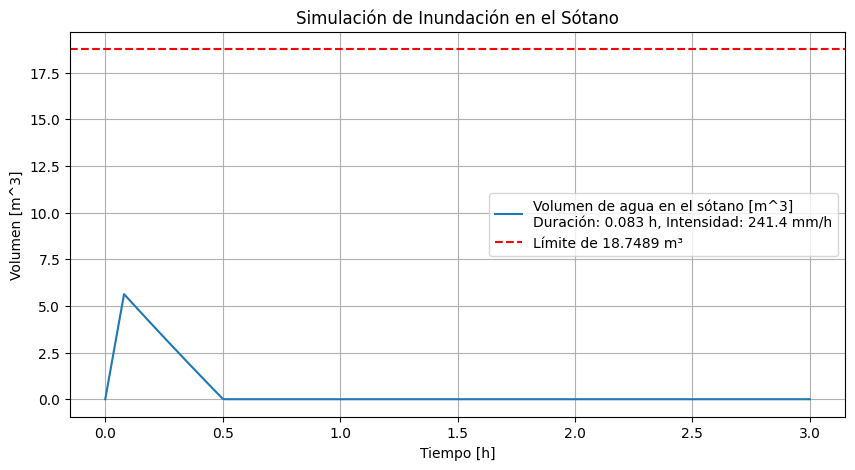

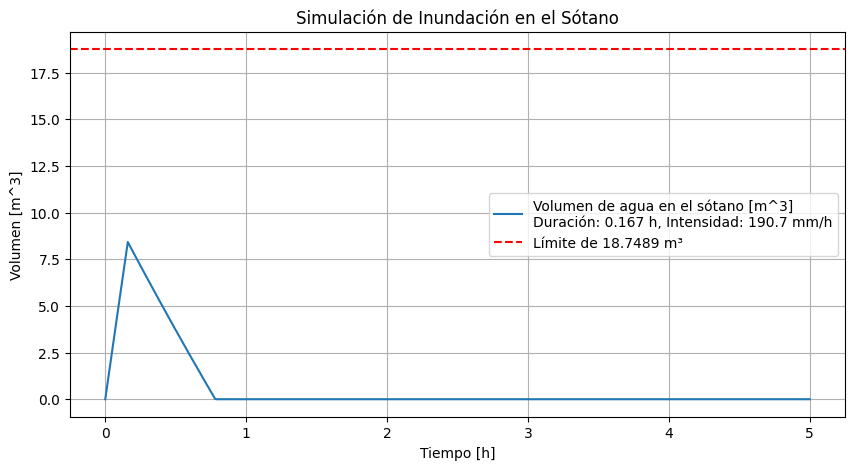

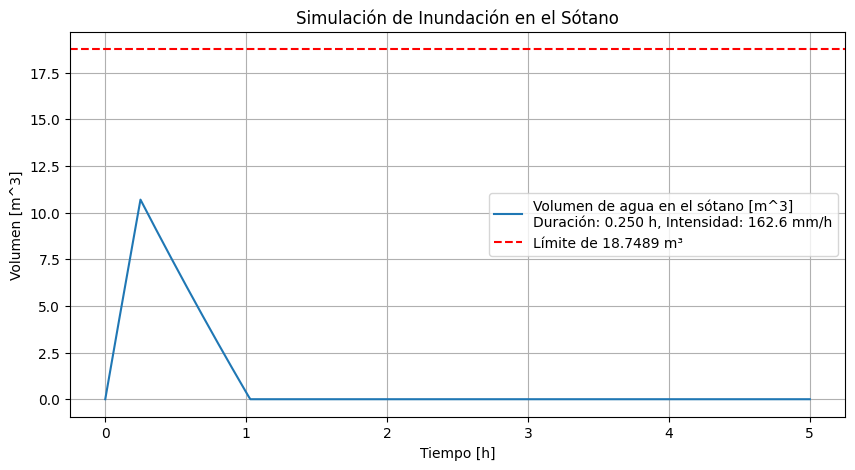

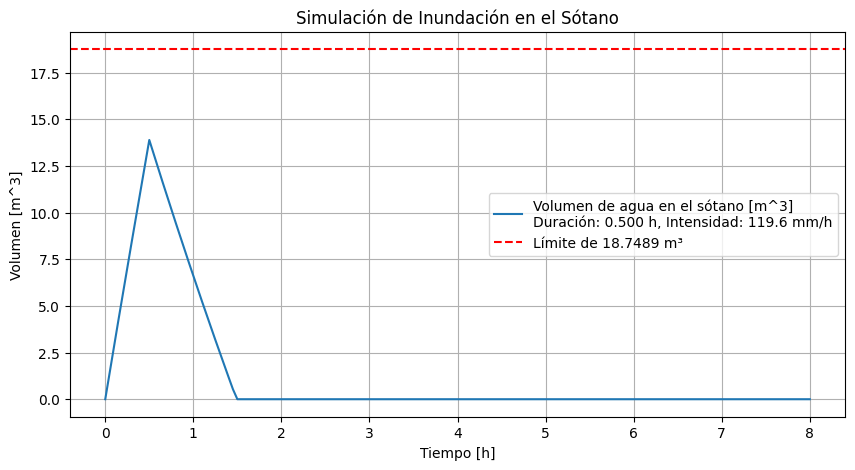

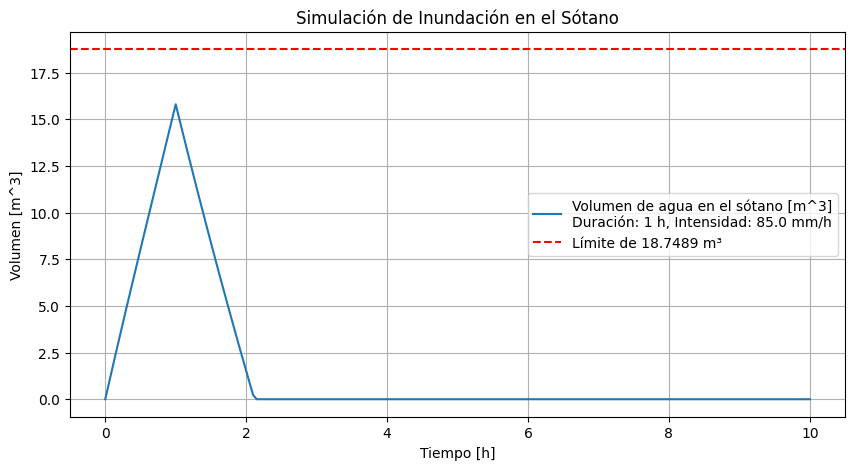

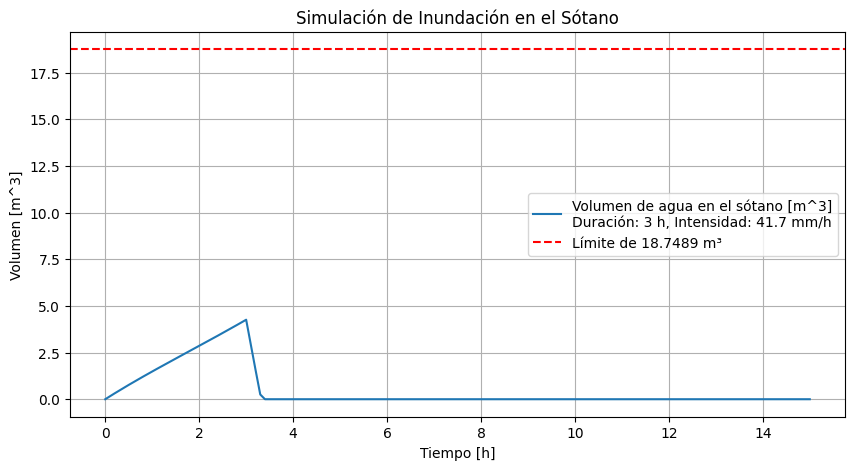

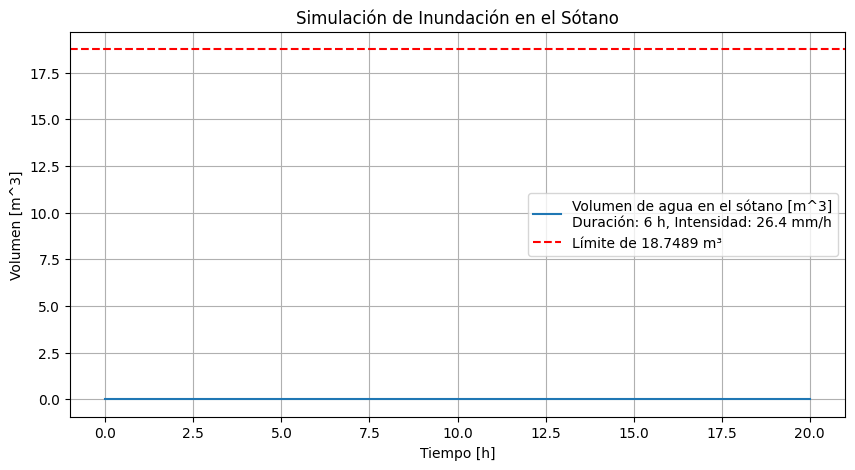

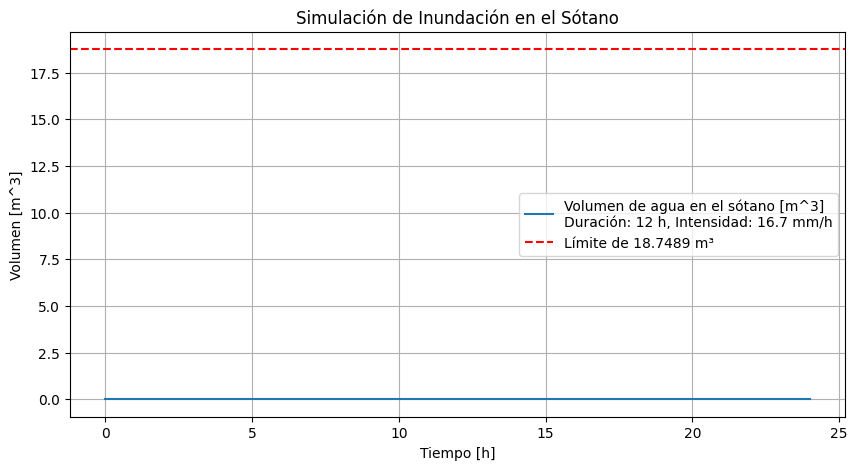

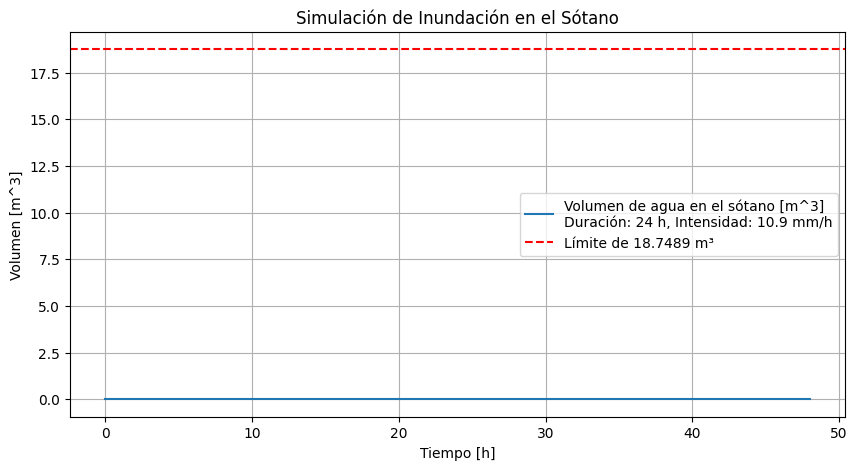

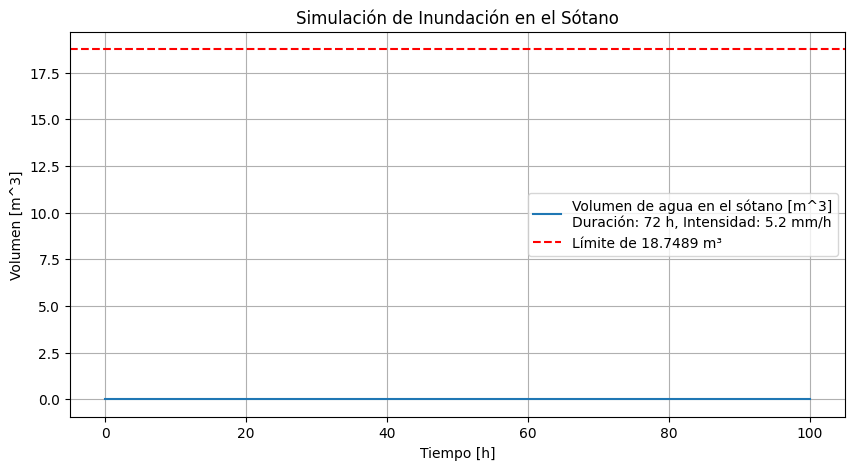

In [9]:
graficar_para_qmax(31.50, valor_maximo_permitido)

# C

Error promedio Euler (dt=0.01): 0.0933851537813279
Error promedio Euler (dt=0.02): 0.1975395896987147
Error máximo Euler (dt=0.01): 0.2759717367888541
Error máximo Euler (dt=0.02): 0.5825618903170184


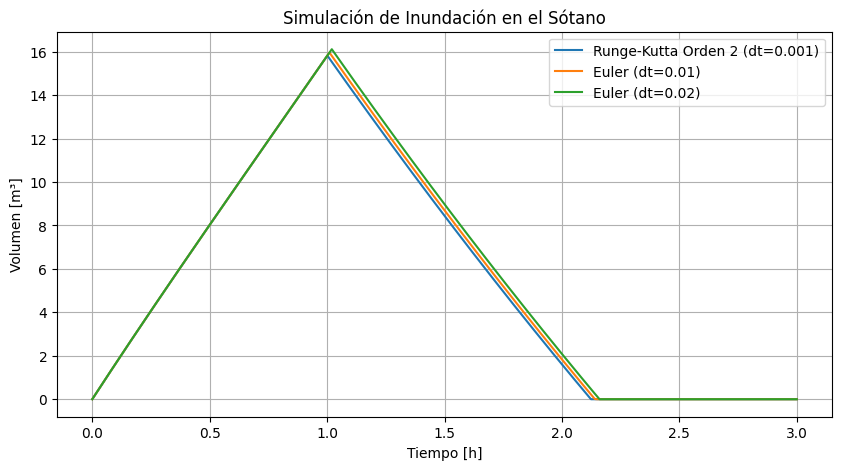

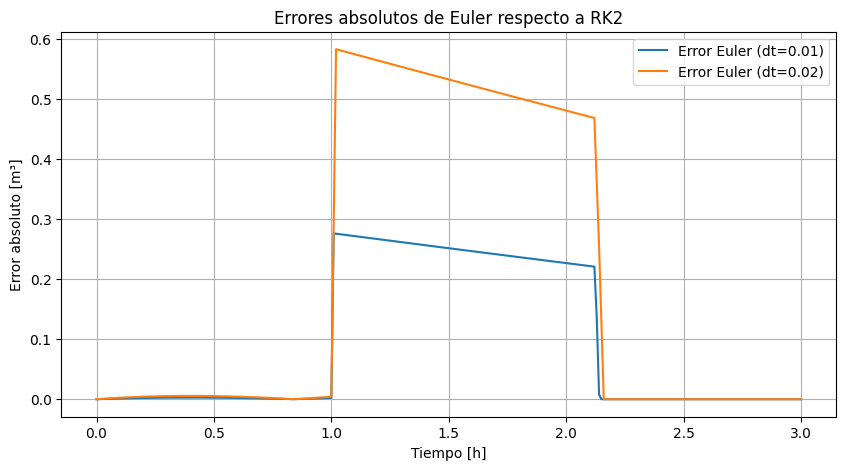

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
NP = 100000
Aterr = 17.32 * NP / 3000  # Área del terreno [m^2]
Qmax = 31.50  # Caudal máximo que puede extraer la bomba [m^3 / h]
DeltaHmax = 4  # Máximo desnivel que puede extraer la bomba [m]
DeltaHmin = 1  # Mínimo desnivel que puede extraer la bomba [m]
Hs = 3.5  # Altura del sótano [m]
As = 8.66 * 8.66  # Área del sótano [m^2]
Vs = Hs * As  # Volumen del sótano [m^3]
tk = 1 - NP / 140000  # Tiempo característico [h]
Csat = 0.9  # Coeficiente de infiltración con el suelo saturado de agua []

# Valores iniciales
V0 = 0  # [m^3]
C0 = 0.6  # []

# Parámetros de lluvia para 60 minutos
duracion = 1  # [h]
intensidad = 85.0 / 1000  # Intensidad de la lluvia [m/h] (convertido de mm/h)
dt_values = [0.01, 0.02]  # Dos pasos de tiempo distintos
dt_rk = 0.001

# Funciones auxiliares
def Q_out_func(V, Qmax, DeltaHmax, DeltaHmin, Hs, As):
    H = V / As
    DeltaH = Hs - H
    return Qmax * np.sqrt((DeltaHmax - DeltaH) / (DeltaHmax - DeltaHmin))

def Q_in_func(C, intensidad, Aterr):
    return C * intensidad * Aterr

# Simulación usando RK2
def run_rk2(dt, tiempoTotal):
    pasos = int(tiempoTotal / dt)
    V = np.zeros(pasos + 1)
    C = np.zeros(pasos + 1)
    t = np.linspace(0, tiempoTotal, pasos + 1)

    V[0] = V0
    C[0] = C0

    for i in range(1, pasos + 1):
        if t[i-1] <= duracion:
            Q_in = Q_in_func(C[i-1], intensidad, Aterr)
        else:
            Q_in = 0

        k1_V = dt * (Q_in - Q_out_func(V[i-1], Qmax, DeltaHmax, DeltaHmin, Hs, As))
        k1_C = dt * (V[i-1] / (Vs * tk)) * (Csat - C[i-1])

        if t[i-1] <= duracion:
            Q_in = Q_in_func((C[i-1] + k1_C), intensidad, Aterr)
        else:
            Q_in = 0

        k2_V = dt * (Q_in - Q_out_func(V[i-1] + k1_V, Qmax, DeltaHmax, DeltaHmin, Hs, As))
        k2_C = dt * ((V[i-1] + k1_V) / (Vs * tk)) * (Csat - (C[i-1] + k1_C))

        V[i] = V[i-1] + (k1_V + k2_V) / 2
        C[i] = C[i-1] + (k1_C + k2_C) / 2

        if V[i] < 0:
            V[i] = 0

    return t, V

# Simulación usando Euler
def run_euler(dt, tiempoTotal):
    pasos = int(tiempoTotal / dt)
    V = np.zeros(pasos + 1)
    C = np.zeros(pasos + 1)
    t = np.linspace(0, tiempoTotal, pasos + 1)

    V[0] = V0
    C[0] = C0

    for i in range(1, pasos + 1):
        if t[i-1] <= duracion:
            Q_in = Q_in_func(C[i-1], intensidad, Aterr)
        else:
            Q_in = 0

        Q_out = Q_out_func(V[i-1], Qmax, DeltaHmax, DeltaHmin, Hs, As)

        V[i] = V[i-1] + dt * (Q_in - Q_out)
        C[i] = C[i-1] + dt * (V[i-1] / (Vs * tk)) * (Csat - C[i-1])

        if V[i] < 0:
            V[i] = 0

    return t, V

# Ejecutar simulaciones
tiempoTotal = 3  # [h]

# RK2
t_rk2, V_rk2 = run_rk2(dt_rk, tiempoTotal)

# Euler con dos pasos de tiempo distintos
t_euler_1, V_euler_1 = run_euler(dt_values[0], tiempoTotal)
t_euler_2, V_euler_2 = run_euler(dt_values[1], tiempoTotal)


# # Interpolar resultados de RK2 para comparación
V_rk2_interp_1 = np.interp(t_euler_1, t_rk2, V_rk2)
V_rk2_interp_2 = np.interp(t_euler_2, t_rk2, V_rk2)

# Calcular errores
error_euler_1 = np.abs(V_euler_1 - V_rk2_interp_1)
error_euler_2 = np.abs(V_euler_2 - V_rk2_interp_2)

# Error promedio y máximo
error_promedio_1 = np.mean(error_euler_1)
error_promedio_2 = np.mean(error_euler_2)
error_max_1 = np.max(error_euler_1)
error_max_2 = np.max(error_euler_2)

print(f'Error promedio Euler (dt={dt_values[0]}): {error_promedio_1}')
print(f'Error promedio Euler (dt={dt_values[1]}): {error_promedio_2}')
print(f'Error máximo Euler (dt={dt_values[0]}): {error_max_1}')
print(f'Error máximo Euler (dt={dt_values[1]}): {error_max_2}')

# Gráficos
plt.figure(figsize=(10, 5))
plt.plot(t_rk2, V_rk2, label=f'Runge-Kutta Orden 2 (dt={dt_rk})')
plt.plot(t_euler_1, V_euler_1, label=f'Euler (dt={dt_values[0]})')
plt.plot(t_euler_2, V_euler_2, label=f'Euler (dt={dt_values[1]})')
plt.xlabel('Tiempo [h]')
plt.ylabel('Volumen [m³]')
plt.title('Simulación de Inundación en el Sótano')
plt.legend()
plt.grid()
plt.show()



# Gráfico de errores
plt.figure(figsize=(10, 5))
plt.plot(t_euler_1, error_euler_1, label=f'Error Euler (dt={dt_values[0]})')
plt.plot(t_euler_2, error_euler_2, label=f'Error Euler (dt={dt_values[1]})')
plt.xlabel('Tiempo [h]')
plt.ylabel('Error absoluto [m³]')
plt.title('Errores absolutos de Euler respecto a RK2')
plt.legend()
plt.grid()
plt.show()